<a href="https://colab.research.google.com/github/caohungphu/CS114.L21/blob/main/main/Colab/Sarcasm_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><b>CS114.L21 - MÁY HỌC - MACHINE LEARNING</b></h1>
<h1 align="center"><b>BÀI TẬP COLAB SỐ 04 (31/05/2021)</b></h1>
 
## **1. YÊU CẦU:**

- 31/05/2021: Tìm dataset
- 14/06/2021: Train model


## **2. NHÓM THỰC HIỆN**
- Cao Hưng Phú - 19520214 - 19520214@gm.uit.edu.vn
- Nguyễn Thành Công - 19521294 - 19521294@gm.uit.edu.vn
- Trần Huỳnh Kỳ Anh - 19521216 - 19521216@gm.uit.edu.vn

## **3. LINK GITHUB VÀ CÔNG CỤ**
- Link GitHub nhóm: https://github.com/caohungphu/CS114.L21/
- Link GitHub bài làm: [Sarcasm_detection.ipynb](https://github.com/caohungphu/CS114.L21/blob/main/Colab/Sarcasm_detection.ipynb)
- Link GitHub code crawl dataset: [Crawler](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/Sarcasm_Detection/Crawler)
- Link GitHub dataset: [Sarcasm_detection.csv](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/Sarcasm_Detection/Sarcasm_Detection_Full.csv)
- Link đồng bộ dữ liệu của nhóm: [https://sv2.hungphu.tk/CS114/](https://sv2.hungphu.tk/CS114/)
- Link kiểm tra dữ liệu hiện tại: [https://sv2.hungphu.tk/CS114/data.php](https://sv2.hungphu.tk/CS114/data.php)


## **4. SOURCE CODE**

### **4.1. Nguồn tham khảo**

1. Thư viện pandas: https://pandas.pydata.org/docs/
2. Thông tin dữ liệu: https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection
3. Thư viện request: https://docs.python-requests.org/en/master/
4. Thư viện bs4: https://www.crummy.com/software/BeautifulSoup/bs4/doc/
5. Loại bỏ các kí tự bằng regex: https://stackoverflow.com/questions/6323296/python-remove-anything-that-is-not-a-letter-or-number
6. Thư viện plot: https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html
7. Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK: https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
8. Choosing the right estimator: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
9. Working With Text Data: https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

### **4.2. Code**

#### **4.2.1. Thu thập dữ liệu**

- Sau khi tham khảo thông tin dữ liệu ở trang Kaggle (Mục 4.1.2) nhóm tiến hành crawl dữ liệu thành 3 thuộc tính:
  + `headline` : Tiêu đề bài báo
  + `article_link` : Đường dẫn đến bài báo
  + `is_sarcastic` : Nhãn của bài báo (1 là bài báo châm biếm, 0 là bài báo bình thường)

##### **4.2.1.1 Tìm các trang web để crawl dữ liệu**
- Nhóm tiến hành đi tìm danh sách các trang báo châm biếm và không châm biếm và lưu lại các link để chia nhau ra crawl dữ liệu
- Link mà nhóm tìm được:

| #No | Link                             | Lable |
|-----|----------------------------------|-------|
| 1   | https://theonion.com             | 1     |
| 2   | https://huffpost.com             | 0     |
| 3   | https://newyorker.com            | 1     |
| 4   | https://thepoke.co.uk            | 1     |
| 5   | https://www.nytimes.com          | 0     |
| 6   | https://www.cracked.com          | 1     |
| 7   | https://clickhole.com            | 1     |
| 8   | https://thedailywtf.com          | 1     |
| 9   | https://www.euronews.com         | 0     |
| 10  | https://theguardian.com          | 0     |
| 11  | https://rochdaleherald.co.uk     | 1     |
| 12  | https://newsthump.com            | 1     |
| 13  | https://www.thedailymash.co.uk   | 1     |
| 14  | https://babylonbee.com/          | 1     |
| 15  | https://burrardstreetjournal.com | 1     |

- Nhóm tìm thêm 2 site để làm tập test

| #No | Link                             | Lable |
|-----|----------------------------------|-------|
| 1   | https://time.com                 | 0     |
| 2   | https://www.thebeaverton.com     | 1     |


##### **4.2.1.2 Crawl mẫu một trang web để làm mẫu cho các trang web sau**
- Nhóm tiến hành crawl mẫu site: https://theonion.com để làm mẫu cho các trang web khác
- Sau khi truy cập và quan sát trang web, nhóm nhận thấy có thể crawl nhiều dữ liệu từ link https://www.theonion.com/sitemap

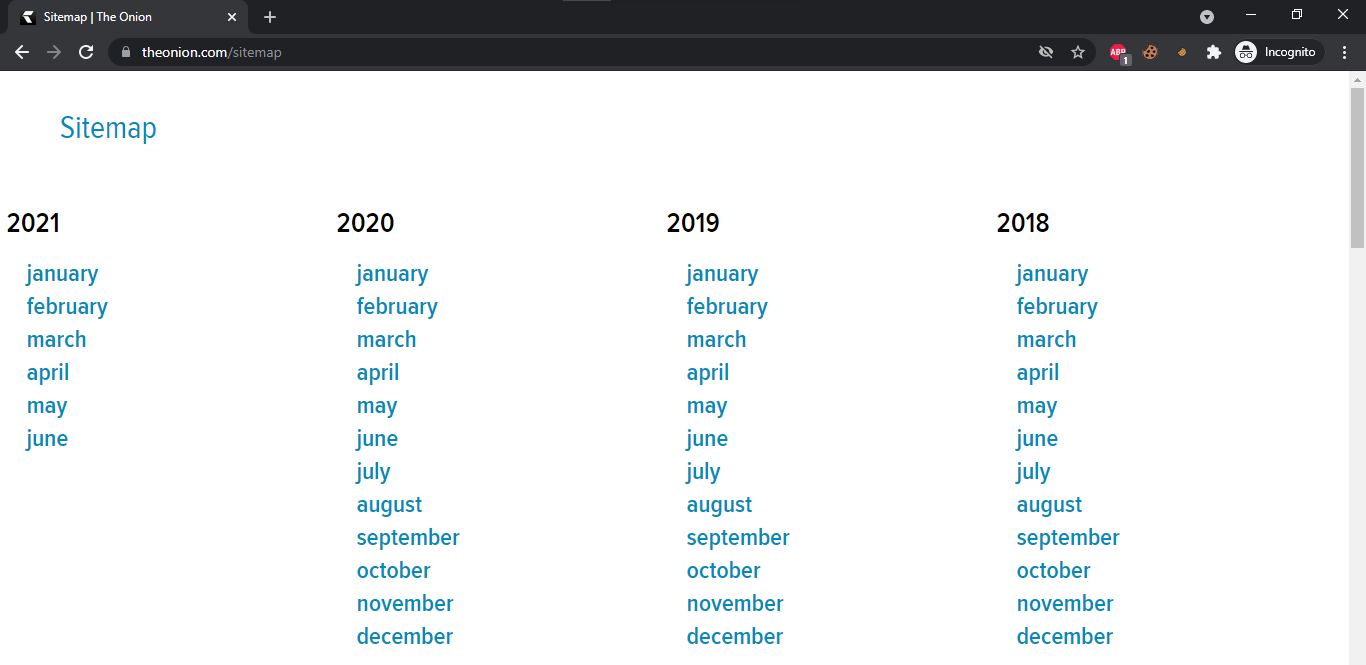

- Khi truy cập vào https://www.theonion.com/sitemap nhóm thấy để xem bài viết ngày nào thì truy cập định dạng link như sau https://www.theonion.com/sitemap/{Năm}/{Tháng}/{Ngày}
- Ví dụ sau khi truy cập: https://www.theonion.com/sitemap/2021/april/30 (Ngày 30/4/2021)


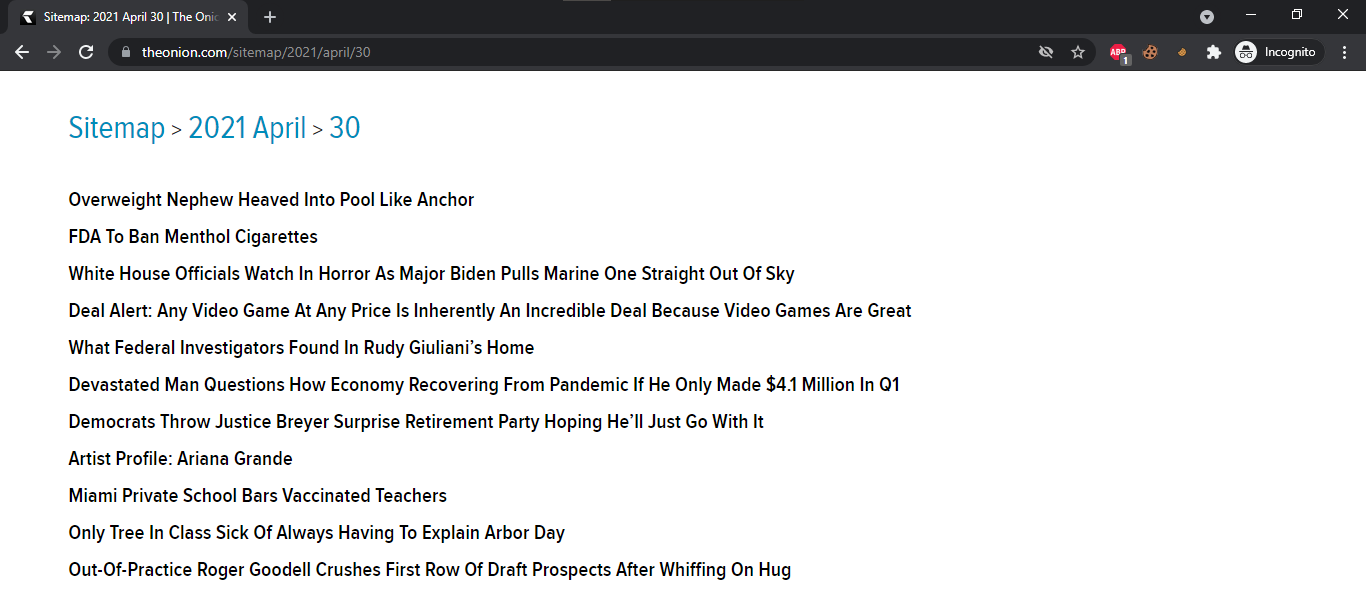

- Nhóm tiến hành kiểm tra các thẻ trên web để tiến hành thu thập dữ liệu gốm headline và link của bài viết
- Tiêu đề và đường dẫn của các bài viết nằm trong thẻ `<h4>` và có `class = sc-1w8kdgf-1 bwRmiu js_sitemap-article`:
 + Tiêu đề trong thẻ `<a>`
 + Đường dẫn trong thuộc tính `href` của thẻ `<a>`


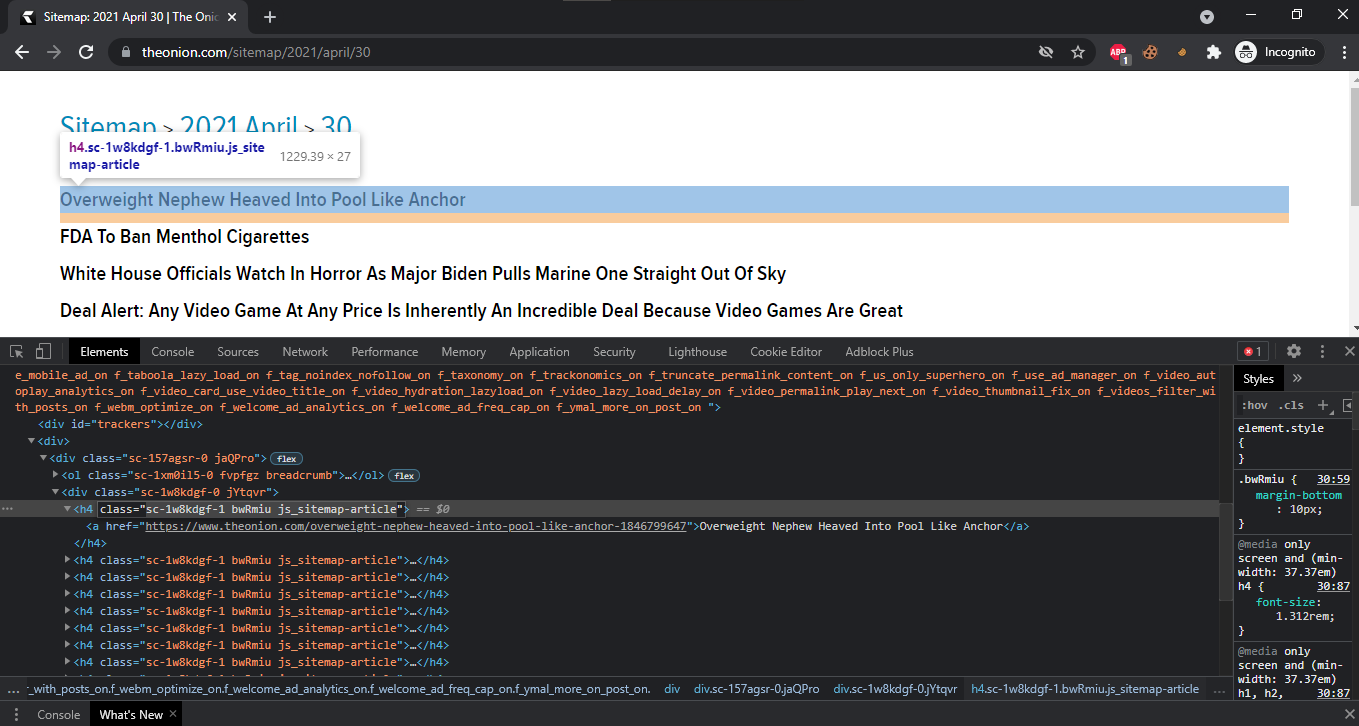

- Nhóm tiến hành viết code crawl dữ liệu từ trang https://www.theonion.com

In [ ]:
# Thêm thư viện cần thiết
import requests
from bs4 import BeautifulSoup
import datetime
import time

# Hàm kiểm tra năm nhuận
def is_leap_year(year):
    return year % 4 == 0 and (year % 100 != 0 or year % 400 == 0)    
  
# Hàm trả về số ngày trong tháng
def getDate(month, year):
    day_of_month = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if is_leap_year(year):
        day_of_month[2] = 29
    return day_of_month[month]

# Hàm chuyển tháng từ số sang chuỗi
def getNameMonth(month):
    if month < 1 or month > 12:
        return 'january'
    name_of_month = ['', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
    return name_of_month[month]

# Hàm lấy tất cả thẻ bài viết trong ngày, tháng, năm truyền vào
def getArticleFromPage(day, month, year):
    # Đường dẫn của url crawl
    urlPage = 'https://www.theonion.com/sitemap/{}/{}/{}'.format(str(year), getNameMonth(month), str(day))
    # Tham số headers này để chống bị chặn request ẩn danh
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'}
    # Gửi request đi
    response = requests.get(urlPage, headers = headers)
    # Dùng BeautifulSoup để parser html
    soupSite = BeautifulSoup(response.text, 'html.parser')
    # Dùng find_all để tìm tất cả các thẻ h4 có class = sc-1w8kdgf-1 bwRmiu js_sitemap-article
    soupArticle = soupSite.find_all("h4", class_="sc-1w8kdgf-1 bwRmiu js_sitemap-article")
    # In ra màn hình xem response status code
    print(response)
    # Trả về mảng các thẻ div
    return soupArticle

# Hàm tìm headline và link bài viết để lưu vào mảng result
def getHeadlineDataFormArticle(soupArticle):
    result = []
    for x in soupArticle:
        # Tìm thẻ a trong div
        x = x.find("a")
        # headline là giá trị thẻ a
        headline = x.get_text()
        # article_link là giá trị thuộc tính href thẻ a
        article_link = x['href']
        # Gán = 1 vì theonion là trang web thuộc dạng châm biếm
        is_sarcastic = '1'
        # Thêm vào mảng result
        result.append([headline, article_link, is_sarcastic])
    # Trả về giá trị result
    return result

# Hàm in ra file các giá trị tìm được
def writeFile(headlineData):
    fileOutput = "theonion.com.txt"
    f = open(fileOutput, "a", encoding="utf-8")
    for i in headlineData:
        strOut = i[0] + "|" + i[1] + "|" + i[2] + "\n"
        f.writelines(strOut)
    f.close()

# Hàm để gọi các giá trị và in thông tin ra console 
def getDataFromPage(day, month, year):
    # In ngày tháng năm
    print("=>>>>> Date: {}/{}/{}:".format(day, month, year))
    # Gọi hàm getArticleFromPage
    soupArticle = getArticleFromPage(day, month, year)
    # Gọi hàm getHeadlineDataFormArticle
    headlineData = getHeadlineDataFormArticle(soupArticle)
    # Gọi hàm writeFile
    writeFile(headlineData)
    # In thông tin đã crawl được
    print("Number of data: ",len(headlineData))
    print("\n")


# Hàm chính để gọi lại hàm getDataFromPage
# Khởi tạo năm bắt đầu và năm kết thúc + tính tháng + ngày
year = 2021
year_stop = 2021 # Nhóm demo đến đầu năm 2021
while year > year_stop - 1:
    month = 12
    if year == 2021:
        month = 6
    while month:
        day = getDate(month, year)
        if year == 2021 and month == 6:
            day = 7
        while day:
            # Gọi hàm chính
            getDataFromPage(day, month, year)
            # Giảm ngày đi 1
            day -= 1
        month -= 1
        break # Dòng này nhóm ngắt để colab demo trong 1 tháng
    year -= 1

=>>>>> Date: 7/6/2021:
<Response [200]>
Number of data:  10


=>>>>> Date: 6/6/2021:
<Response [200]>
Number of data:  0


=>>>>> Date: 5/6/2021:
<Response [200]>
Number of data:  0


=>>>>> Date: 4/6/2021:
<Response [200]>
Number of data:  11


=>>>>> Date: 3/6/2021:
<Response [200]>
Number of data:  11


=>>>>> Date: 2/6/2021:
<Response [200]>
Number of data:  10


=>>>>> Date: 1/6/2021:
<Response [200]>
Number of data:  7




- Nhóm kiểm tra lại dữ liệu xem có đạt hay không

In [ ]:
# Thêm thư viện cần thiết
import pandas as pd
# Đọc file csv bằng thư viện pandas
pd.read_csv("theonion.com.txt", delimiter="|", names=['headline', 'article_link', 'is_sarcastic'])

,headline,article_link,is_sarcastic
0,"Prince Harry, Meghan Markle Announce Birth Of ...",https://www.theonion.com/prince-harry-meghan-m...,1
1,Woman Unnerved By Group Of Guys Standing Aroun...,https://www.theonion.com/woman-unnerved-by-gro...,1
2,American Public Commended For Lasting 8 Rounds...,https://www.theonion.com/american-public-comme...,1
3,Biden Offers Infrastructure Concession By Part...,https://www.theonion.com/biden-offers-infrastr...,1
4,Blockbuster Movies You Never Knew Were Actuall...,https://www.theonion.com/blockbuster-movies-yo...,1
...,...,...,...
93,Instagram Bans Adults From Messaging Teens Who...,https://www.theonion.com/instagram-bans-adults...,1
94,Nation Rocked By 40 Million Acts Of Total Bull...,https://www.theonion.com/nation-rocked-by-40-m...,1
95,Artist Profile: Olivia Rodrigo,https://www.theonion.com/artist-profile-olivia...,1
96,Man Visiting Town Squeezes In Least Important ...,https://www.theonion.com/man-visiting-town-squ...,1


##### **4.2.1.3 Script nhỏ để dễ đồng bộ với các thành viên nhóm**

- Trước khi nhóm tiến hành thu thập dữ liệu từ các trang khác, nhóm tiến hành viết 1 script nhỏ để gộp các dữ liệu thu thập được từ các thành viên trong nhóm dễ hơn, tránh bị trùng lặp và kiểm tra nhanh dữ liệu:
  + Đường dẫn của script: https://sv2.hungphu.tk/CS114/
  + Đường dẫn kiểm tra nhanh dữ liệu: https://sv2.hungphu.tk/CS114/data.php
  + Đường dẫn trả về file CSV: https://sv2.hungphu.tk/CS114/export.php

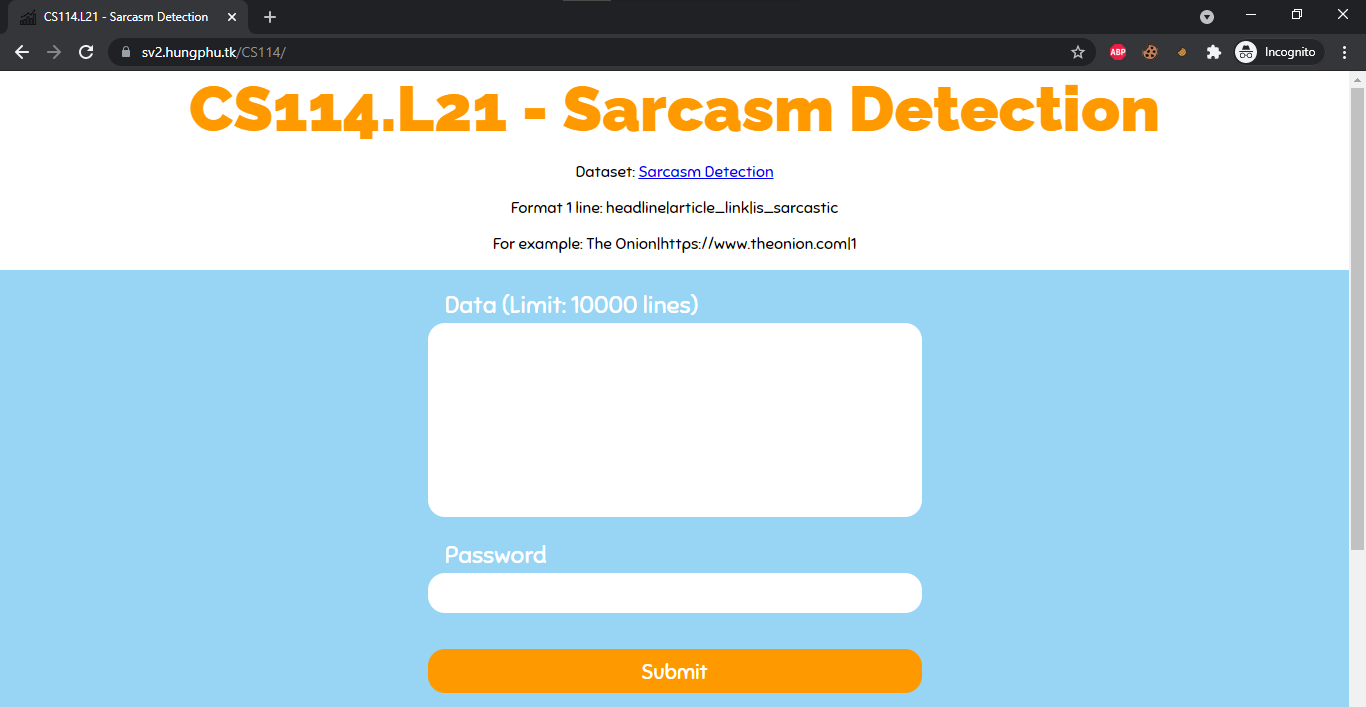

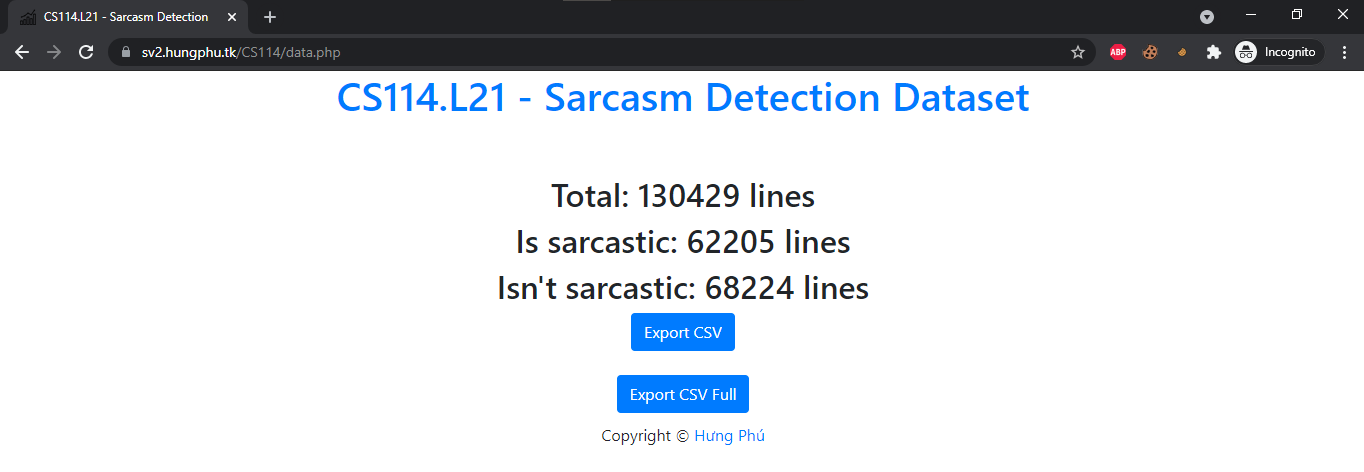

##### **4.2.1.4 Craw dữ liệu từ các trang web còn lại**
- Hầu như các trang còn lại đều có cấu trúc gần giống như trang web mẫu nên nhóm để source code lên github của nhóm (Mục 3)
- Có trang web https://www.nytimes.com/ khác với những trang còn lại là có cấp cho API miễn phí để lấy bài viết, nhóm tiến hành tạo API_KEY và crawl dữ liệu

- Nhóm thử crawl trang web https://www.nytimes.com/ bằng API mà https://www.nytimes.com/ cung cấp

In [ ]:
# Thêm vào thư viện cần thiết
import requests
from bs4 import BeautifulSoup
import datetime
import time
import json

# Lấy mảng bài viết từ trang web
def getArticleFromPage(month, year):
    # API key được tạo từ trang https://www.nytimes.com/
    API_KEY = 'VgAeXa43ETi5AMY6B8fbSWiIdw4cxEop'
    API_url = "https://api.nytimes.com/svc/archive/v1/{}/{}.json?api-key={}".format(str(year), str(month), API_KEY)
    headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36'}
    response = requests.get(API_url, headers = headers)
    # Trả về mảng các bài từ json API trả về
    return response.json()['response']['docs']

# Các hàm còn lại gần giống với các hàm ở code crawl mẫu
def getHeadlineDataFormArticle(soupArticle):
    result = []
    for x in soupArticle:
        headline = x['headline']['main']
        article_link = x['web_url']
        is_sarcastic = '0'
        result.append([headline, article_link, is_sarcastic])
    return result

def writeFile(headlineData):
    fileOutput = "nytimes.com.txt"
    f = open(fileOutput, "a", encoding="utf-8")
    for i in headlineData:
        strOut = i[0] + "|" + i[1] + "|" + i[2] + "\n"
        f.writelines(strOut)
    f.close()
        
def getDataFromPage(month, year):
    print("=>>>>> {}/{}:".format(month, year)) 
    soupArticle = getArticleFromPage(month, year)
    headlineData = getHeadlineDataFormArticle(soupArticle)
    writeFile(headlineData)
    print("Number of data: ",len(headlineData))
    print("\n")

year = 2021
year_stop = 2021 # Năm cần crawl đến
while year > year_stop - 1:
    if year == 2021:
        month = 6
    else:
        month = 12
    while month:
        getDataFromPage(month, year)
        month -= 1
    year -= 1

=>>>>> 6/2021:
Number of data:  2162


=>>>>> 5/2021:
Number of data:  4265


=>>>>> 4/2021:
Number of data:  4592


=>>>>> 3/2021:
Number of data:  4786


=>>>>> 2/2021:
Number of data:  4260


=>>>>> 1/2021:
Number of data:  7001




- Nhóm kiểm tra lại dữ liệu xem có đạt hay không

In [ ]:
# Thêm thư viện cần thiết
import pandas as pd
# Đọc file csv bằng thư viện pandas
pd.read_csv("nytimes.com.txt", delimiter="|", names=['headline', 'article_link', 'is_sarcastic'])

,headline,article_link,is_sarcastic
0,"Glum to Gleeful, Israeli Media React to Possib...",https://www.nytimes.com/2021/05/31/world/middl...,0
1,Serena Williams Wins in the First Round at the...,https://www.nytimes.com/2021/05/31/sports/tenn...,0
2,Illinois Lawmakers Bar Police From Using Decep...,https://www.nytimes.com/2021/05/31/us/Chicago-...,0
3,With the Candlestick in the Study,https://www.nytimes.com/2021/05/31/crosswords/...,0
4,How Do Animals Safely Cross a Highway? Take a ...,https://www.nytimes.com/interactive/2021/05/31...,0
...,...,...,...
54127,Militants Storm Hotel in Somali Capital and Bl...,https://www.nytimes.com/2021/01/31/world/afric...,0
54128,"Not Yet Desperate, Japan and South Korea Plod ...",https://www.nytimes.com/2021/01/31/world/asia/...,0
54129,The Pop Star Wants to Be an Olympian,https://www.nytimes.com/2021/01/31/sports/olym...,0
54130,Your Monday Briefing,https://www.nytimes.com/2021/01/31/briefing/ru...,0


- Các code crawl trang web còn lại nhóm tải lên trang [GitHub](https://github.com/caohungphu/CS114.L21/tree/main/Colab/CSV/Sarcasm_Detection/Crawler) của nhóm (Mục 3) (Do các code gần như giống mục 4.2.1.2)

#### **4.2.2. Đọc dữ liệu và phân tích dữ liệu**

- Đọc dữ liệu từ file CSV đã tổng hợp lại trên Github của nhóm

In [ ]:
# Tải file CSV Train về từ Github
!curl -o Train_Sarcasm_Detection.csv https://raw.githubusercontent.com/caohungphu/CS114.L21/main/Colab/CSV/Sarcasm_Detection/Train_Sarcasm_Detection_Full.csv

# Tải file CSV Test về từ Github
!curl -o Test_Sarcasm_Detection.csv https://raw.githubusercontent.com/caohungphu/CS114.L21/main/Colab/CSV/Sarcasm_Detection/Test_Sarcasm_Detection_Full.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20.2M  100 20.2M    0     0  14.3M      0  0:00:01  0:00:01 --:--:-- 14.3M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2885k  100 2885k    0     0  6050k      0 --:--:-- --:--:-- --:--:-- 6037k


##### **4.2.2.1 Dữ liệu train**

- **Kiểm tra sơ bộ dữ liệu Train**

In [ ]:
# Thêm thư viện cần thiết
import pandas as pd
import numpy as np
import warnings

# Tắt thông báo warning
warnings.filterwarnings("ignore")

# Đọc file CSV và kiểm tra thông tin của file
data_train = pd.read_csv("Train_Sarcasm_Detection.csv")

# Xáo trộn các dòng trong csv và reset lại index
data_train = data_train.sample(frac=1).reset_index(drop=True)

#Kiểm tra lại file dữ liệu có giá trị null hay không
print(data_train.isnull().sum())
data_train

headline        1
article_link    0
is_sarcastic    0
dtype: int64


,headline,article_link,is_sarcastic
0,Frito-Lay Launches New ‘Man Doritos’ To Help M...,https://babylonbee.com/news/frito-lay-launches...,1
1,7 Hilariously Perverted Works By Iconic Kids' ...,https://www.cracked.com/article_23884_7-hilari...,1
2,Republicans Unlearning Facts Learned in Third ...,https://www.newyorker.com/humor/borowitz-repor...,1
3,Wesley Bryan’s Greatest Trick Shot Was Rapid R...,https://www.nytimes.com/2017/06/30/sports/golf...,0
4,Virgil Abloh Apologizes For Looting Comments A...,https://www.huffpost.com/entry/virgil-abloh-lo...,0
...,...,...,...
130424,Ink-Splattered Trump Boys Counter Media Bias B...,https://www.theonion.com/ink-splattered-trump-...,1
130425,Trump Gloats That It's 'A Great Day' For Georg...,https://www.huffpost.com/entry/trump-evokes-ge...,0
130426,Why a Data Breach at a Genealogy Site Has Priv...,https://www.nytimes.com/2020/08/01/technology/...,0
130427,Watch: Brawl in Taiwan's parliament,https://www.euronews.com/2017/07/18/brawl-in-t...,0


- Chỉ có một dòng có giá trị null, nhóm tiến hành xóa dòng đó ra khỏi data

In [ ]:
# Xóa dòng có giá trị null ra khỏi dữ liệu
data_train = data_train.dropna(how = 'any')

# Kiểm tra lại dữ liệu
print(data_train.isnull().sum())
data_train

headline        0
article_link    0
is_sarcastic    0
dtype: int64


,headline,article_link,is_sarcastic
0,Frito-Lay Launches New ‘Man Doritos’ To Help M...,https://babylonbee.com/news/frito-lay-launches...,1
1,7 Hilariously Perverted Works By Iconic Kids' ...,https://www.cracked.com/article_23884_7-hilari...,1
2,Republicans Unlearning Facts Learned in Third ...,https://www.newyorker.com/humor/borowitz-repor...,1
3,Wesley Bryan’s Greatest Trick Shot Was Rapid R...,https://www.nytimes.com/2017/06/30/sports/golf...,0
4,Virgil Abloh Apologizes For Looting Comments A...,https://www.huffpost.com/entry/virgil-abloh-lo...,0
...,...,...,...
130424,Ink-Splattered Trump Boys Counter Media Bias B...,https://www.theonion.com/ink-splattered-trump-...,1
130425,Trump Gloats That It's 'A Great Day' For Georg...,https://www.huffpost.com/entry/trump-evokes-ge...,0
130426,Why a Data Breach at a Genealogy Site Has Priv...,https://www.nytimes.com/2020/08/01/technology/...,0
130427,Watch: Brawl in Taiwan's parliament,https://www.euronews.com/2017/07/18/brawl-in-t...,0


- **Phân tích dữ liệu Train**

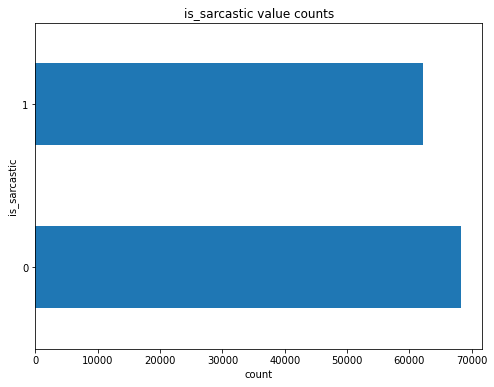

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị bằng plot giá trị is_sarcastic
data_train['is_sarcastic'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("is_sarcastic")
plt.title("is_sarcastic value counts");

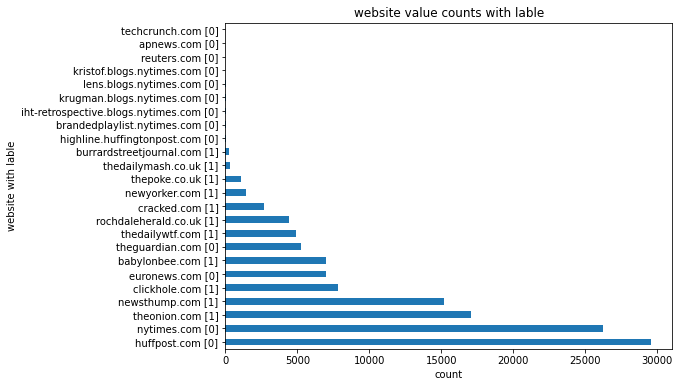

In [ ]:
# Hàm lấy địa chỉ website từ article_link và is_sarcastic
def getWebsite(article_link, is_sarcastic):
    return article_link.split('/')[2].replace("www.", "") + " [" + str(is_sarcastic) + "]"

# Tạo một cột mới chứa địa chỉ website
data_train['website'] = data_train.apply(lambda x: getWebsite(x['article_link'], x['is_sarcastic']), axis=1)

# Hiển thị bằng plot giá trị website
data_train['website'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("website with lable")
plt.title("website value counts with lable");

##### **4.2.2.2 Dữ liệu test**

- **Kiểm tra sơ bộ dữ liệu Test**

In [ ]:
# Thêm thư viện cần thiết
import pandas as pd
import numpy as np
import warnings

# Tắt thông báo warning
warnings.filterwarnings("ignore")

# Đọc file CSV và kiểm tra thông tin của file
data_test = pd.read_csv("Test_Sarcasm_Detection.csv")

#Kiểm tra lại file dữ liệu có giá trị null hay không
print(data_test.isnull().sum())
data_test

headline        0
article_link    0
is_sarcastic    0
dtype: int64


,headline,article_link,is_sarcastic
0,Why the COVID-19 Variants Spreading in India A...,https://time.com/5959057/india-covid-19-variants,0
1,"To Solve Disordered Migration, Governments Nee...",https://time.com/5963576/mexico-tree-planting-...,0
2,India’s COVID-19 Crisis Is Spiraling Out of Co...,https://time.com/5964796/india-covid-19-failure,0
3,"In His Speech to Congress, Joe Biden Sets Out ...",https://time.com/5995109/biden-congress-speech...,0
4,The Indian Government Is Silencing Critics Eve...,https://time.com/6005847/india-government-sile...,0
...,...,...,...
18731,Local company offers nonsense approach to netw...,https://www.thebeaverton.com/2010/05/local-com...,1
18732,Most Common Methods of Transportation By Annua...,https://www.thebeaverton.com/2010/05/most-comm...,1
18733,Campus police warn of ‘sicko’ targeting women’...,https://www.thebeaverton.com/2010/05/campus-po...,1
18734,Maschismo exhibited by eating hot sauce,https://www.thebeaverton.com/2010/05/maschismo...,1


- **Phân tích dữ liệu Test**

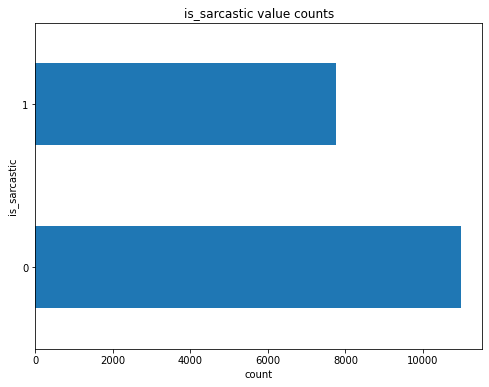

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị bằng plot giá trị is_sarcastic
data_test['is_sarcastic'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("is_sarcastic")
plt.title("is_sarcastic value counts");

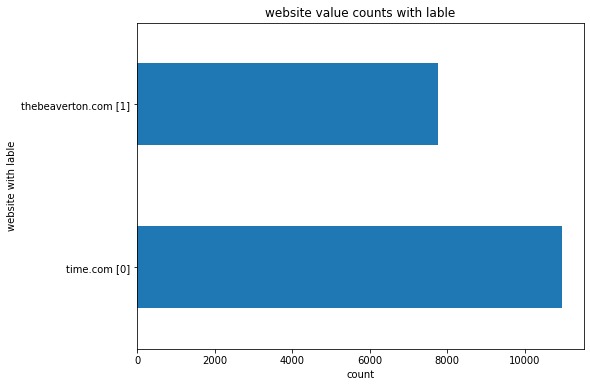

In [ ]:
# Hàm lấy địa chỉ website từ article_link và is_sarcastic
def getWebsite(article_link, is_sarcastic):
    return article_link.split('/')[2].replace("www.", "") + " [" + str(is_sarcastic) + "]"

# Tạo một cột mới chứa địa chỉ website
data_test['website'] = data_test.apply(lambda x: getWebsite(x['article_link'], x['is_sarcastic']), axis=1)

# Hiển thị bằng plot giá trị website
data_test['website'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("count")
plt.ylabel("website with lable")
plt.title("website value counts with lable");

#### **4.2.3. Tiền xử lí dữ liệu**

In [ ]:
# Thêm thư viện re
import re

# Data train
# Lấy 2 cột cần thiết là headline và is_sarcastic
new_data_train = data_train.copy()
new_data_train = new_data_train[['headline', 'is_sarcastic']]

# Data test
# Lấy 2 cột cần thiết là headline và is_sarcastic
new_data_test = data_test.copy()
new_data_test = new_data_test[['headline', 'is_sarcastic']]

# Hàm convert chuỗi
def convertString(x):
    # Chuyển sang kí tự chữ thường
    x = x.lower()
    # Loại bỏ các kí tự khác 0 - 9, a - z và khoảng cách
    x = re.sub("[^0-9a-z ]", '', x)
    return x

# Convert cột headline bằng hàm convertString và kiểm tra lại bảng
new_data_train['headline'] = new_data_train['headline'].apply(convertString)
new_data_test['headline'] = new_data_test['headline'].apply(convertString)

In [ ]:
# Xem lại bảng Train
new_data_train

,headline,is_sarcastic
0,fritolay launches new man doritos to help men ...,1
1,7 hilariously perverted works by iconic kids c...,1
2,republicans unlearning facts learned in third ...,1
3,wesley bryans greatest trick shot was rapid ri...,0
4,virgil abloh apologizes for looting comments a...,0
...,...,...
130424,inksplattered trump boys counter media bias by...,1
130425,trump gloats that its a great day for george f...,0
130426,why a data breach at a genealogy site has priv...,0
130427,watch brawl in taiwans parliament,0


In [ ]:
# Xem lại bảng Test
new_data_test

,headline,is_sarcastic
0,why the covid19 variants spreading in india ar...,0
1,to solve disordered migration governments need...,0
2,indias covid19 crisis is spiraling out of cont...,0
3,in his speech to congress joe biden sets out a...,0
4,the indian government is silencing critics eve...,0
...,...,...
18731,local company offers nonsense approach to netw...,1
18732,most common methods of transportation by annua...,1
18733,campus police warn of sicko targeting womens l...,1
18734,maschismo exhibited by eating hot sauce,1


#### **4.2.4. Thử nghiệm phân loại bằng Naive Bayes và SGDClassifier**

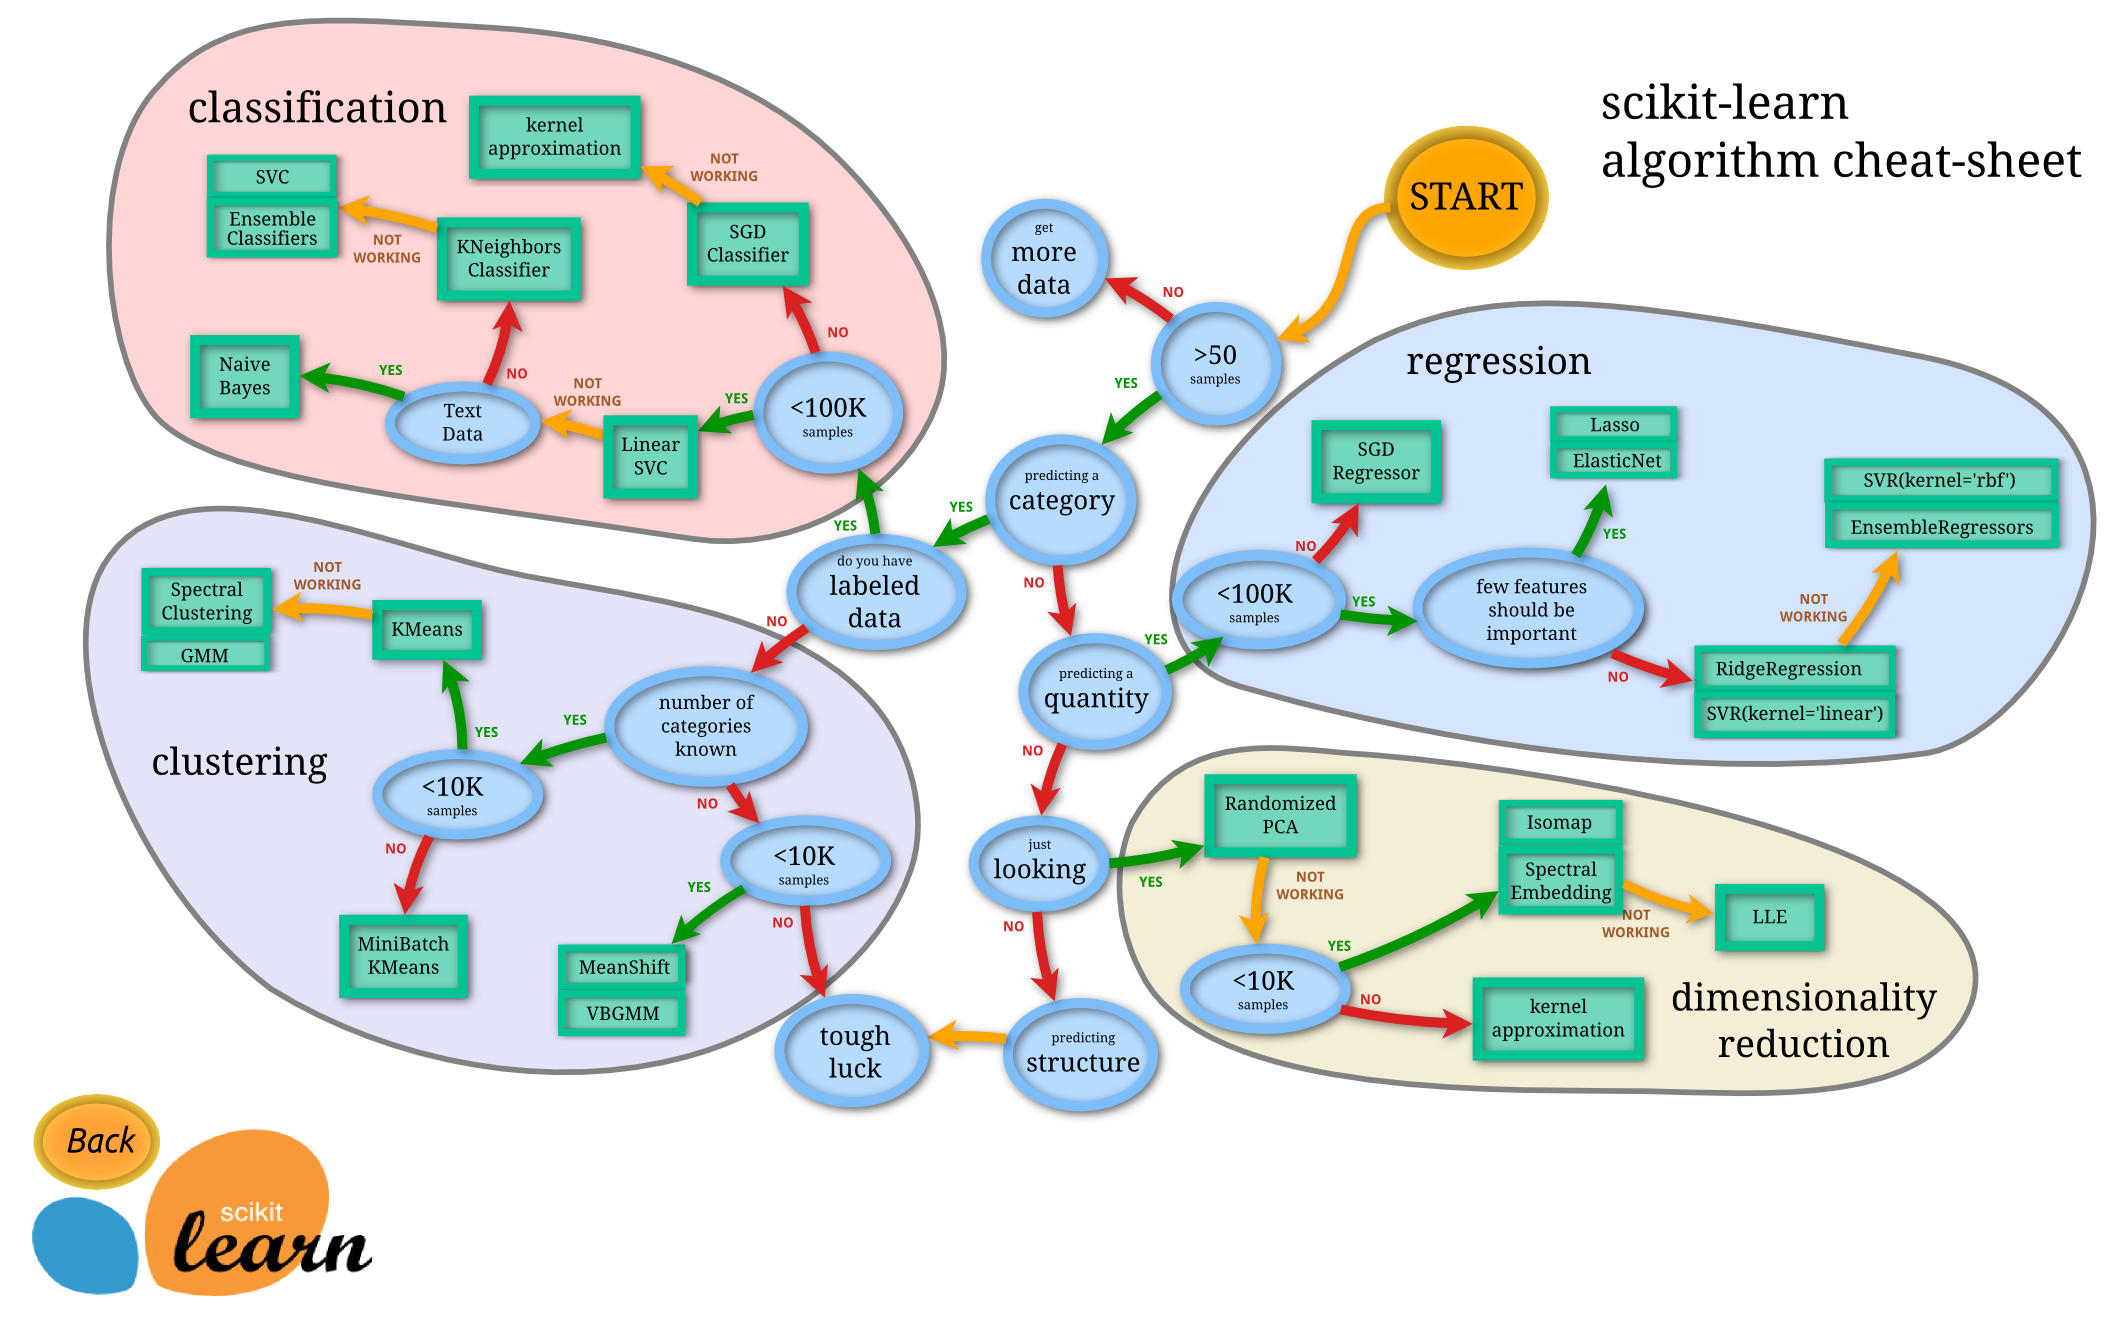

- Sau khi tham khảo "Machine Learning, NLP: Text Classification using scikit-learn, python and NLTK." (Mục 4.1.7) và "Choosing the right estimator" (Mục 4.1.8) nhóm tiến hành thử nghiệm bằng Naive Bayes và SGDClassifier

- Code nhóm tham khảo từ: [Naive Bayes Classifier for Text Classification](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) (Mục 4.1.9)


In [ ]:
# Thêm thư viện cần thiết
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

In [ ]:
# Phân chia tập train và tập test
X_train, y_train = new_data_train['headline'], new_data_train['is_sarcastic']
X_test, y_test = new_data_test['headline'], new_data_test['is_sarcastic']

print("Train: ", len(X_train))
print("Test: ", len(X_test))

Train:  130428
Test:  18736


In [ ]:
# Phân loại bằng MultinomialNB()

# Tạo pipeline
clf_NB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Fit model
clf_NB.fit(X_train, y_train)

# Predict test
y_predict = clf_NB.predict(X_test)

# In bảng kết quả
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     10971
           1       0.75      0.70      0.72      7765

    accuracy                           0.78     18736
   macro avg       0.77      0.77      0.77     18736
weighted avg       0.78      0.78      0.78     18736



In [ ]:
# Phân loại bằng MultinomialNB()

# Tạo pipeline
clf_SGD = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', SGDClassifier()),
])

# Fit model
clf_SGD.fit(X_train, y_train)

# Predict test
y_predict = clf_SGD.predict(X_test)

# In bảng kết quả
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81     10971
           1       0.73      0.76      0.75      7765

    accuracy                           0.79     18736
   macro avg       0.78      0.78      0.78     18736
weighted avg       0.79      0.79      0.79     18736



#### **4.2.5. Thử nghiệm khác**

In [ ]:
import nltk 
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Tokening
X_train_nltk = []
for sent in new_data_train['headline']:
  X_train_nltk.append(word_tokenize(sent))
X_test_nltk = []
for sent in new_data_test['headline']:
  X_test_nltk.append(word_tokenize(sent))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Tạo tập stop words từ nltk
sw_nltk = set(stopwords.words("english"))
# Thêm stop words từ spacy
import spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
stop_words = list(set(sw_nltk) | set(sw_spacy))


In [ ]:
print(stop_words)
len(stop_words)

['five', 'nowhere', 'beyond', 'back', 'most', 'see', 'due', 'everywhere', 'we', 'other', 'out', 'either', 'and', 'nine', 'over', 'hereupon', "isn't", 'amongst', 'within', 'aren', 'four', "mightn't", 'between', 'whoever', 'nothing', 'shouldn', "'m", 'together', 'less', 'was', 'against', "won't", 't', 'ever', 'really', 'whether', 'theirs', 'something', 'mustn', '’ve', 'it', 'anyway', 'perhaps', 'mostly', 'yours', 'so', 're', 'hence', 'whither', '’re', 'elsewhere', 'toward', 'latter', 'nevertheless', '‘d', 'however', 'become', 'still', 'about', 'such', 'not', '’s', 'from', 'those', 'how', 'sometimes', 'by', 'meanwhile', 'behind', 'next', 'two', 'becoming', 'another', 'various', "couldn't", 'hereby', 'seemed', 'rather', 'beside', 'get', 'were', 'nobody', 'one', 'wouldn', "hasn't", 'our', 'ourselves', 'sixty', 'eleven', 'across', 'six', 'except', 'which', 'weren', 'thus', 'there', 'whence', 'already', 'noone', 'becomes', 'done', "that'll", 'has', 'none', 'just', "you've", 'besides', 'twenty

382

In [ ]:
filtered_train_list = []
filtered_test_list = []
# Lược bỏ stop words trong tập dữ liệu train
for words_in_quote in X_train_nltk:
  filtered_train_sent = []
  for word in words_in_quote:
    if word not in stop_words:
          filtered_train_sent.append(word)
  filtered_train_list.append(filtered_train_sent)

# Lược bỏ stop words trong tập dữ liệu test
for words_in_quote in X_test_nltk:
  filtered_test_sent = []
  for word in words_in_quote:
    if word not in stop_words:
          filtered_test_sent.append(word)
  filtered_test_list.append(filtered_test_sent)

In [ ]:
# Tập dữ liệu sau khi lược bớt từ
for sent in filtered_train_list[:20]:
  print(sent)

['fritolay', 'launches', 'new', 'man', 'doritos', 'help', 'men', 'ruder', 'slobs']
['7', 'hilariously', 'perverted', 'works', 'iconic', 'kids', 'cartoonists']
['republicans', 'unlearning', 'facts', 'learned', 'grade', 'compete', 'primary']
['wesley', 'bryans', 'greatest', 'trick', 'shot', 'rapid', 'rise', 'pga', 'win']
['virgil', 'abloh', 'apologizes', 'looting', 'comments', 'explains', '50', 'donation']
['merrick', 'garland', 'sitting', 'parked', 'car', 'mitch', 'mcconnells', 'driveway']
['amid', 'coronavirus', 'concerns', 'worship', 'band', 'members', 'play', 'drum', 'cage']
['michael', 'cohen', 'regrets', 'smacking', 'donald', 'trump', 'head']
['government', 'aid', 'businesses']
['women', 'spotlight', 'lens']
['25', 'trumps', 'reelection', 'spending', 'continues', 'lawyers']
['week', 'pictures', 'week', '20', '2019']
['975000', 'california']
['battlehardened', 'squad', 'leader', 'gives', 'rousing', 'speech', 'resistance', 'soldiers', 'tattered', 'im', 'flag']
['americans', 'praying'

In [ ]:
X_train, y_train = filtered_train_list, new_data_train['is_sarcastic']
X_test, y_test = filtered_test_list, new_data_test['is_sarcastic']

In [ ]:
# Do tập test là list không fit được nên chuyển tập list thành string 
X_train = ["<some_space>".join(x) for x in X_train]
X_test =["<some_space>".join(x) for x in X_test]

In [ ]:

vectorizer = CountVectorizer(tokenizer = lambda x: x.split("<some_space>"), analyzer="word")

X_train=vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
clf_NB = MultinomialNB()
clf_NB.fit(X_train,y_train)
# Predict test
y_predict = clf_NB.predict(X_test)

# In bảng kết quả
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80     10971
           1       0.72      0.72      0.72      7765

    accuracy                           0.77     18736
   macro avg       0.76      0.76      0.76     18736
weighted avg       0.77      0.77      0.77     18736



In [ ]:
from gensim.models import word2vec

### **5.1. Nhận xét**


### **5.2. Trả lời yêu cầu đề bài**
